In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv("heart_failure_clinical_records_dataset.csv")

In [3]:
data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [4]:
data.shape

(299, 13)

 # What is the distribution of age among heart failure patients in the dataset

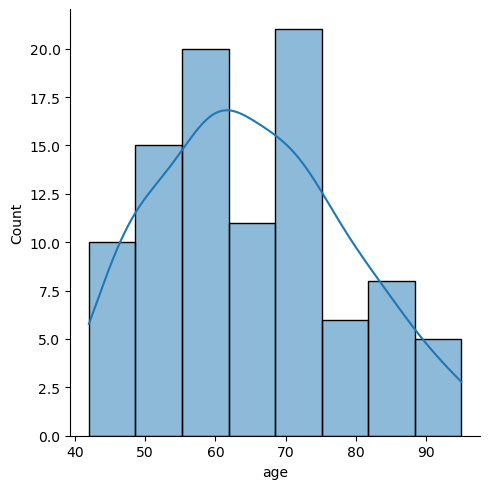

In [8]:
data_failure=data[data['DEATH_EVENT']==1]
sns.displot(data_failure['age'],kde=True)

<AxesSubplot: xlabel='age', ylabel='Density'>

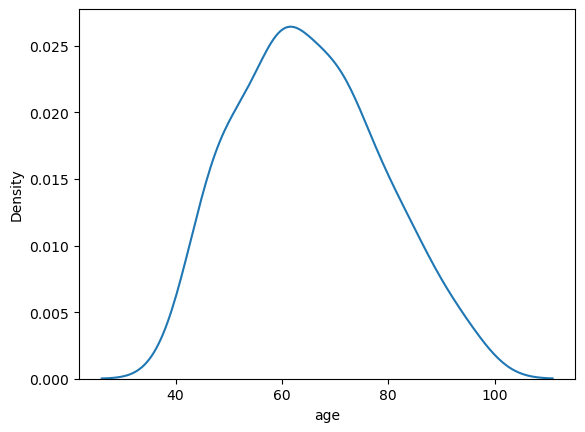

In [9]:
sns.kdeplot(data_failure['age'])

 # How does the death rate vary with age

In [28]:
data['age_categ'] = pd.cut(data['age'], bins=[30, 40, 50,  60, 70, 80,90,100], labels=['30-40', '41-50', '51-60', '61-70', '71-80', '81-90', '91-100'])

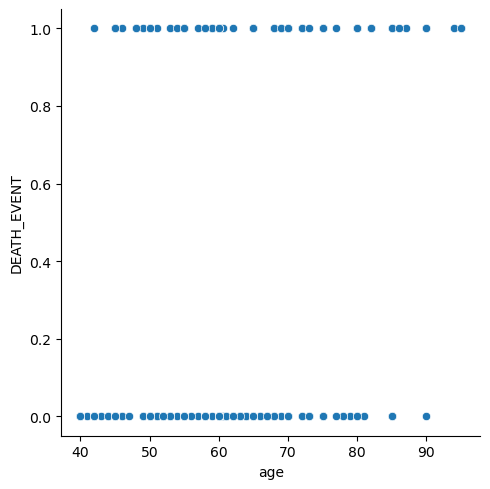

In [42]:
sns.relplot(x='age', y='DEATH_EVENT', data=data, kind='scatter')

In [62]:
data_death=data[data['DEATH_EVENT']==1]


<AxesSubplot: xlabel='age_categ', ylabel='count'>

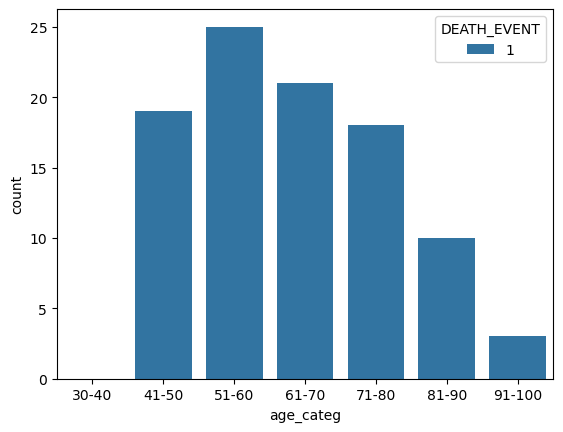

In [63]:
sns.countplot(x='age_categ', hue='DEATH_EVENT', data=data_death)

In [ ]:
df_age_death['death_rate']=

#  What is the percentage of male and female patients in the dataset?

In [19]:
data['sex'].value_counts()

1    194
0    105
Name: sex, dtype: int64

In [22]:
print('No of females=',data['sex'].value_counts()[0])

No of females= 105


In [23]:
print('No of males=',data['sex'].value_counts()[1])

No of males= 194


In [12]:
print("Percentage of males=",data['sex'].value_counts()[1]/sum(data['sex'].value_counts())*100)

Percentage of males= 64.88294314381271


In [14]:
print("Percentage of males=",data['sex'].value_counts()[0]/sum(data['sex'].value_counts())*100)

Percentage of males= 35.11705685618729


# How does the platelet count vary among different age groups

<AxesSubplot: xlabel='age', ylabel='platelets'>

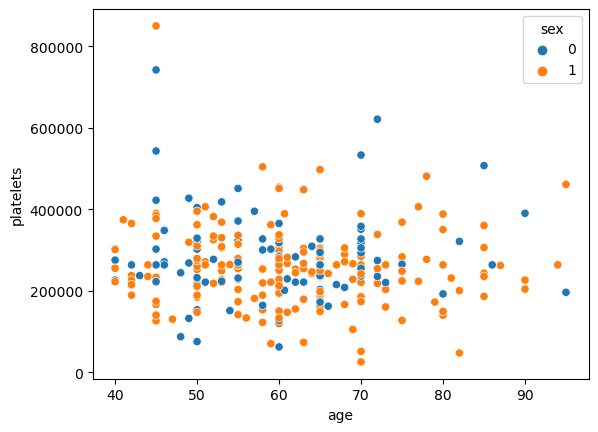

In [22]:
sns.scatterplot(x='age',y='platelets',data=data,hue='sex')

In [18]:
data['age'].min()

40.0

In [17]:
data['age'].max()

95.0

<AxesSubplot: xlabel='age_categ', ylabel='platelets'>

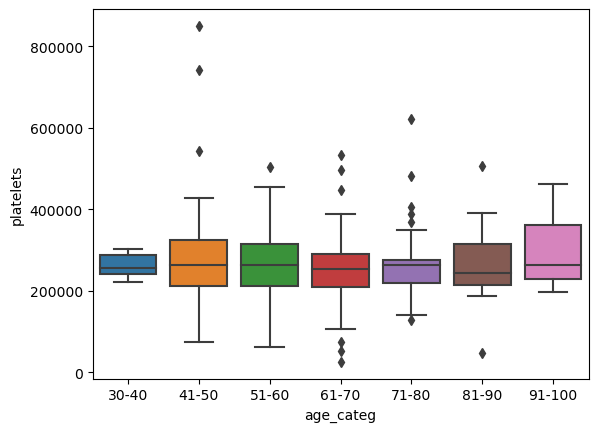

In [14]:
sns.boxplot(x='age_categ', y='platelets', data=data)

40.0

#  Is there a correlation between creatinine and sodium levels in the blood

In [37]:
creatinin=data['creatinine_phosphokinase']/data['creatinine_phosphokinase'].abs().max()
creatinin

0      0.074036
1      1.000000
2      0.018573
3      0.014120
4      0.020354
         ...   
294    0.007760
295    0.231523
296    0.262053
297    0.306958
298    0.024933
Name: creatinine_phosphokinase, Length: 299, dtype: float64

In [39]:
sodium=data['serum_sodium']/data['serum_sodium'].abs().max()
sodium

0      0.878378
1      0.918919
2      0.871622
3      0.925676
4      0.783784
         ...   
294    0.966216
295    0.939189
296    0.932432
297    0.945946
298    0.918919
Name: serum_sodium, Length: 299, dtype: float64

<AxesSubplot: xlabel='creatinine_phosphokinase', ylabel='serum_sodium'>

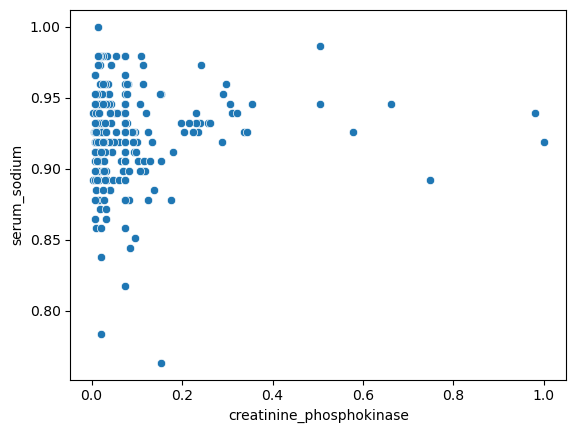

In [32]:
sns.scatterplot(x=creatinin,y=sodium)

In [40]:
sodium.corr(creatinin)

0.05955015583372566

# How does the prevalence of high blood pressure differ between male and female patients

In [54]:
data.groupby(['sex'])['high_blood_pressure'].sum()

sex
0    44
1    61
Name: high_blood_pressure, dtype: int64

In [56]:
percentage_high_bp_males=data.groupby(['sex'])['high_blood_pressure'].sum()[1]/data.groupby(['sex'])['high_blood_pressure'].sum().sum()
percentage_high_bp_females=data.groupby(['sex'])['high_blood_pressure'].sum()[0]/data.groupby(['sex'])['high_blood_pressure'].sum().sum()

In [57]:
percentage_high_bp_males

0.580952380952381

In [58]:
percentage_high_bp_females

0.41904761904761906

# What is the relationship between smoking habits and the occurrence of heart failure

In [20]:
df_smoking=pd.crosstab(data['smoking'],data['DEATH_EVENT'])
df_smoking

DEATH_EVENT,0,1
smoking,,
0,137,66
1,66,30


<AxesSubplot: xlabel='smoking', ylabel='count'>

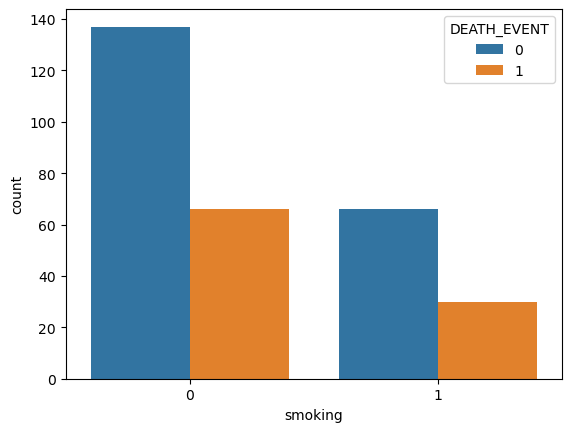

In [25]:
sns.countplot(x='smoking', hue='DEATH_EVENT', data=data)


<AxesSubplot: xlabel='DEATH_EVENT', ylabel='count'>

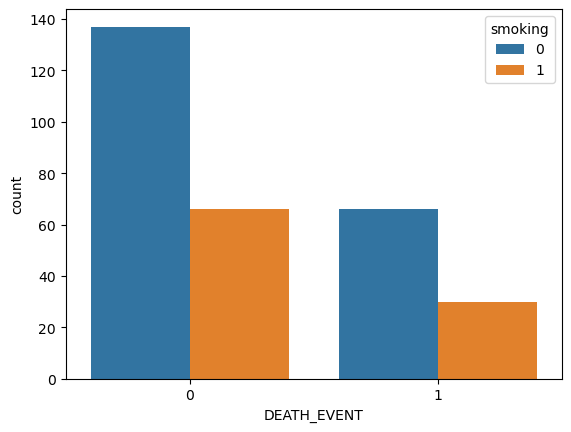

In [26]:
sns.countplot(x='DEATH_EVENT', hue='smoking', data=data)

 # Are there any noticeable patterns in the distribution of death events across different age groups

<AxesSubplot: xlabel='age_categ', ylabel='count'>

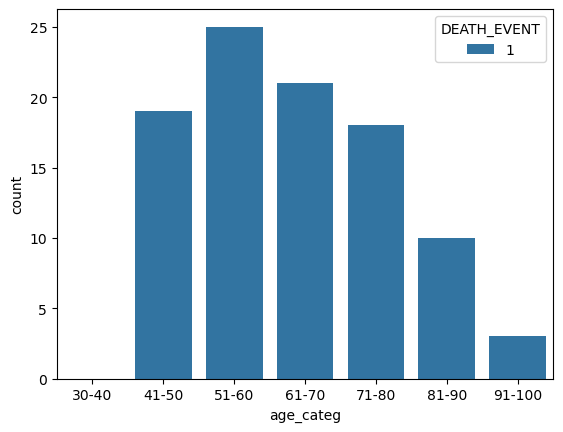

In [64]:
data_death=data[data['DEATH_EVENT']==1]
sns.countplot(x='age_categ', hue='DEATH_EVENT', data=data_death)

# Is there any significant difference in erection fraction between patients with and without diabetes

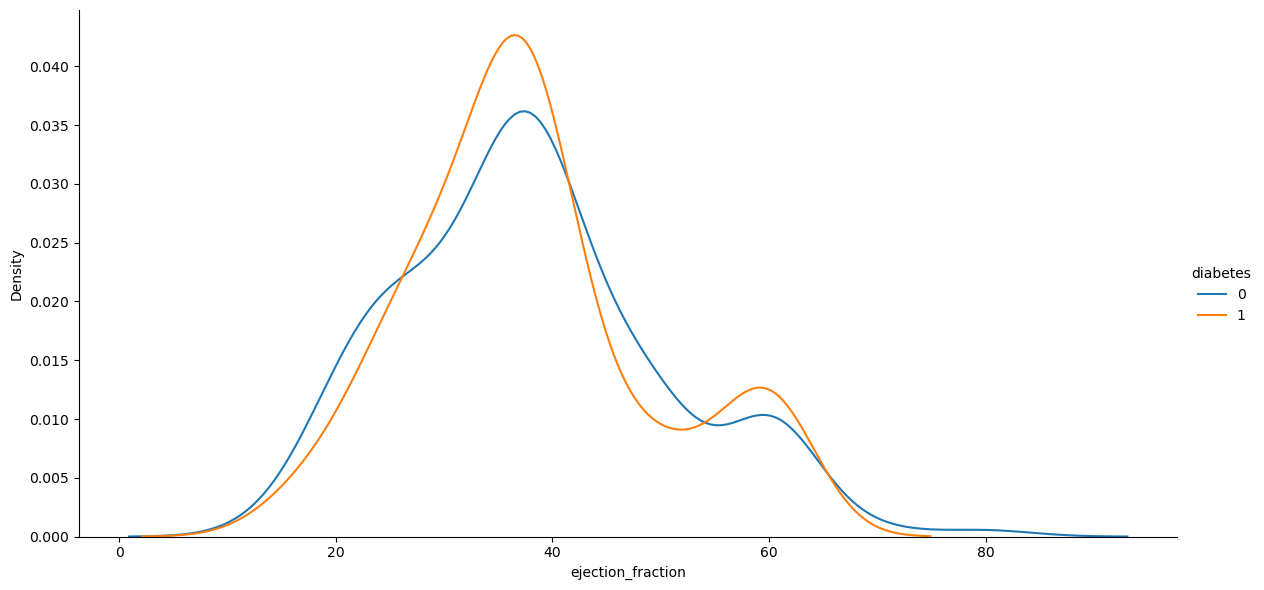

In [68]:
grid=sns.FacetGrid(data,hue='diabetes',height=6,aspect=2)
grid.map(sns.kdeplot,'ejection_fraction')
grid.add_legend()

# How does the serum creatinine level vary between patients who survived and those who did not?

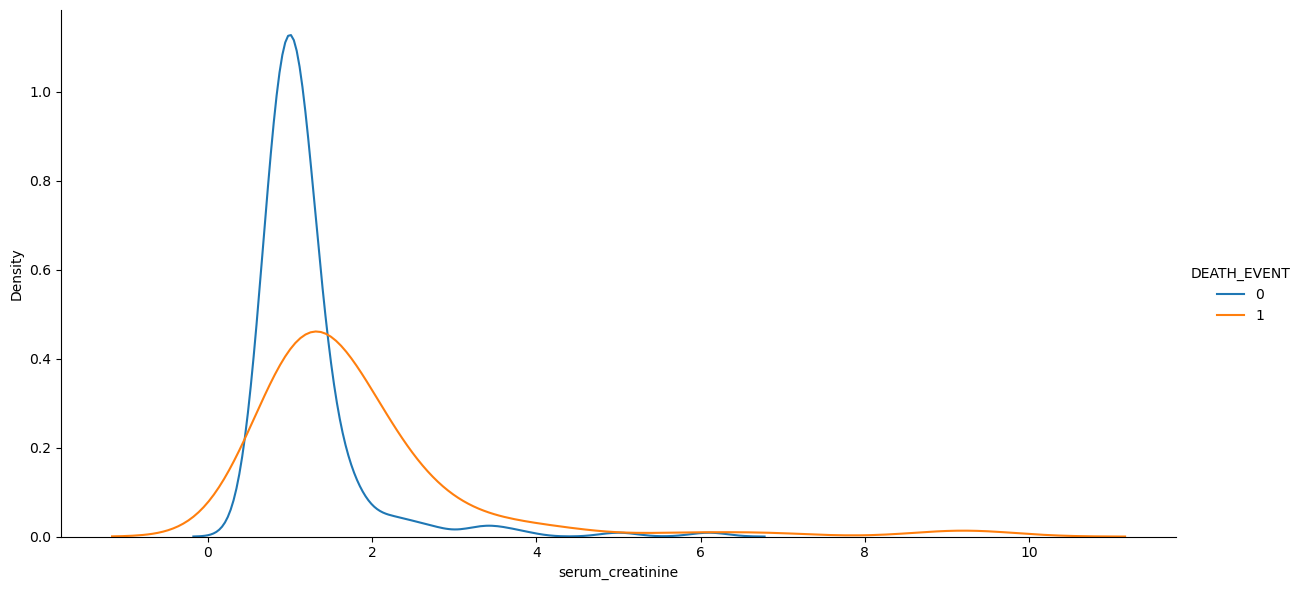

In [69]:
grid=sns.FacetGrid(data,hue='DEATH_EVENT',height=6,aspect=2)
grid.map(sns.kdeplot,'serum_creatinine')
grid.add_legend()